<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Running K-Means for K = 2
Silhouette Score = 0.7041


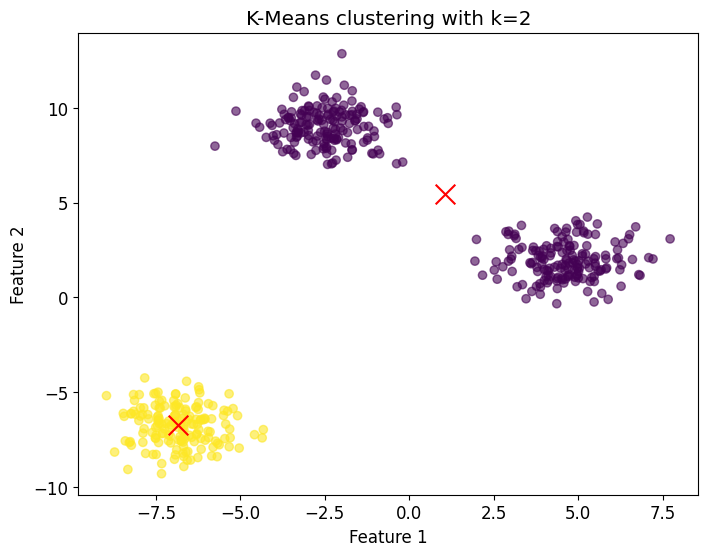


Running K-Means for K = 3
Silhouette Score = 0.5212


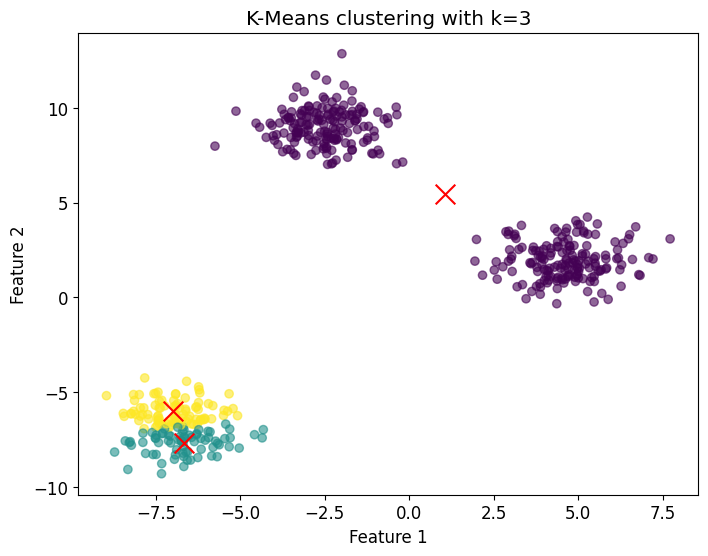


Running K-Means for K = 4
Silhouette Score = 0.6402


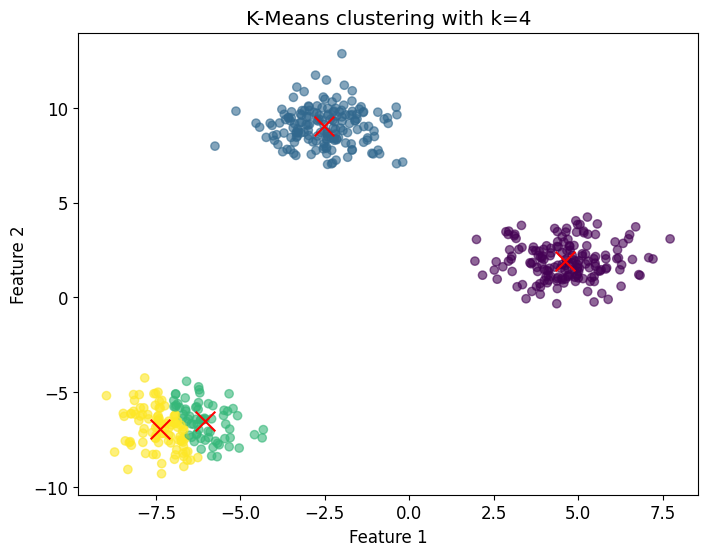

In [51]:
import numpy as np

class KMeansNumpy:
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def _initialize_centroids(self, X):
        # Randomly choose k unique data points as initial centroids
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[indices]

    def _assign_clusters(self, X, centroids):
        # Compute distances between each point and centroids and assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        # Update centroids by calculating mean of points in each cluster
        new_centroids = np.zeros_like(self.centroids)
        for i in range(self.k):
            points_in_cluster = X[labels == i]
            if points_in_cluster.shape[0] > 0:
                new_centroids[i] = points_in_cluster.mean(axis=0)
            else:
                # If a cluster lost all points, keep previous centroid
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def fit(self, X):
        # Initialize centroids
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            labels = self._assign_clusters(X, self.centroids)
            new_centroids = self._update_centroids(X, labels)

            # Stop if centroids do not change
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels, self.centroids

def silhouette_score_manual(X, labels):
    # Calculate silhouette score manually using numpy (simplified version)
    n = X.shape[0]
    unique_labels = np.unique(labels)
    if len(unique_labels) == 1:
        return -1  # Silhouette score undefined for 1 cluster

    a = np.zeros(n)
    b = np.zeros(n)
    for i in range(n):
        same_cluster = (labels == labels[i])
        other_clusters = (labels != labels[i])

        if np.sum(same_cluster) > 1:
            a[i] = np.mean(np.linalg.norm(X[i] - X[same_cluster], axis=1))
        else:
            a[i] = 0

        b_vals = []
        for label in unique_labels:
            if label != labels[i]:
                cluster_points = X[labels == label]
                b_vals.append(np.mean(np.linalg.norm(X[i] - cluster_points, axis=1)))
        b[i] = np.min(b_vals)

    silhouette_vals = (b - a) / np.maximum(a, b)
    return np.mean(silhouette_vals)

def visualize_clusters(X, labels, centroids, k):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200)
    plt.title(f'K-Means clustering with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example usage:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Generate sample data
    X, y = make_blobs(n_samples=500, centers=3, random_state=42)

    for k in [2, 3, 4]:
        print(f"\nRunning K-Means for K = {k}")

        model = KMeansNumpy(k=k)
        labels, centroids = model.fit(X)

        score = silhouette_score_manual(X, labels)
        print(f"Silhouette Score = {score:.4f}")

        visualize_clusters(X, labels, centroids, k)
